In [1]:
'''
1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks'?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
'''

"\n1.) What was the change in price of the stock over time?\n2.) What was the daily return of the stock on average?\n3.) What was the moving average of the various stocks?\n4.) What was the correlation between different stocks'?\n5.) How much value do we put at risk by investing in a particular stock?\n6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)\n"

# 1. What was the change in price of the stock overtime?

In [2]:

!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [6]:

import yfinance as yf



In [7]:
from datetime import datetime

In [8]:
tech_list = ['AAPL', 'GOOG' , 'MSFT' , 'AMZN' , 'RELIANCE.NS' ,'TATASTEEL.NS' , 'GOLDBEES.BO']

In [9]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [10]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


C:\Users\91756\AppData\Local\Temp\ipykernel_10608\4217387217.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\91756\AppData\Local\Temp\ipykernel_10608\4217387217.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\91756\AppData\Local\Temp\ipykernel_10608\4217387217.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\91756\AppData\Local\Temp\ipykernel_10608\4217387217.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  globals()[stock] = yf.download(stock, start, end)
[****

In [31]:
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON',
                 'RELIANCE', 'TATASTEEL', 'GOLDBEES']

# 2. Download data properly into a DICTIONARY
company_data = {}
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for ticker, name in zip(tech_list, company_names):
    df = yf.download(ticker, start, end)
    df["company_name"] = name            # readable name
    df["ticker"] = ticker                # actual symbol
    company_data[ticker] = df            # store in dict

# 3. Create full dataframe
df = pd.concat(company_data.values(), axis=0, ignore_index=True)

# 4. Preview data
df.tail(10)

C:\Users\91756\AppData\Local\Temp\ipykernel_10608\3625304400.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\91756\AppData\Local\Temp\ipykernel_10608\3625304400.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\91756\AppData\Local\Temp\ipykernel_10608\3625304400.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\91756\AppData\Local\Temp\ipykernel_10608\3625304400.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1

Price  Close High  Low Open Volume company_name       ticker Close High  Low  \
Ticker  AAPL AAPL AAPL AAPL   AAPL                            GOOG GOOG GOOG   
1732     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1733     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1734     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1735     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1736     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1737     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1738     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1739     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1740     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   
1741     NaN  NaN  NaN  NaN    NaN     GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN   

Price   ...        Close         High          Low         Open       Volume  \
Ticker  ... TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS   
1732    ...          NaN          NaN          NaN          NaN          NaN   
1733    ...          NaN          NaN          NaN          NaN          NaN   
1734    ...          NaN          NaN          NaN          NaN          NaN   
1735    ...          NaN          NaN          NaN          NaN          NaN   
1736    ...          NaN          NaN          NaN          NaN          NaN   
1737    ...          NaN          NaN          NaN          NaN          NaN   
1738    ...          NaN          NaN          NaN          NaN          NaN   
1739    ...          NaN          NaN          NaN          NaN          NaN   
1740    ...          NaN          NaN          NaN          NaN          NaN   
1741    ...          NaN          NaN          NaN          NaN          NaN   

Price        Close        High         Low        Open      Volume  
Ticker GOLDBEES.BO GOLDBEES.BO GOLDBEES.BO GOLDBEES.BO GOLDBEES.BO  
1732    101.690002  101.849998   99.650002  100.169998   4806410.0  
1733    103.279999  103.820000  101.000000  101.000000   1795844.0  
1734    102.680000  103.269997  102.129997  103.269997   1274944.0  
1735    105.370003  105.449997  104.209999  104.209999   1578721.0  
1736    103.830002  106.180000  103.500000  105.510002   3914463.0  
1737    101.970001  102.370003  101.000000  102.290001   4464051.0  
1738    100.919998  101.190002  100.040001  101.000000   4137896.0  
1739    102.260002  102.699997  101.459999  101.739998   2768917.0  
1740    101.589996  102.089996  101.019997  102.059998   2389353.0  
1741    101.989998  102.250000  100.650002  101.589996   3288389.0  

[10 rows x 37 columns]

In [24]:
df


Price        Close        High         Low        Open      Volume  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
0       231.821518  232.199812  228.705621  230.417878  90152800.0   
1       234.001663  234.509377  232.279457  232.279457  45986200.0   
2       233.872253  234.628841  232.757301  233.414333  33498400.0   
3       236.261459  236.739294  232.916587  233.752801  28481400.0   
4       238.511261  239.705855  236.092209  236.201715  48137100.0   
...            ...         ...         ...         ...         ...   
1737           NaN         NaN         NaN         NaN         NaN   
1738           NaN         NaN         NaN         NaN         NaN   
1739           NaN         NaN         NaN         NaN         NaN   
1740           NaN         NaN         NaN         NaN         NaN   
1741           NaN         NaN         NaN         NaN         NaN   

Price  company_name       ticker Close High  Low  ...        Close  \
Ticker                            GOOG GOOG GOOG  ... TATASTEEL.NS   
0             APPLE         AAPL   NaN  NaN  NaN  ...          NaN   
1             APPLE         AAPL   NaN  NaN  NaN  ...          NaN   
2             APPLE         AAPL   NaN  NaN  NaN  ...          NaN   
3             APPLE         AAPL   NaN  NaN  NaN  ...          NaN   
4             APPLE         AAPL   NaN  NaN  NaN  ...          NaN   
...             ...          ...   ...  ...  ...  ...          ...   
1737       GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN  ...          NaN   
1738       GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN  ...          NaN   
1739       GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN  ...          NaN   
1740       GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN  ...          NaN   
1741       GOLDBEES  GOLDBEES.BO   NaN  NaN  NaN  ...          NaN   

Price          High          Low         Open       Volume       Close  \
Ticker TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS GOLDBEES.BO   
0               NaN          NaN          NaN          NaN         NaN   
1               NaN          NaN          NaN          NaN         NaN   
2               NaN          NaN          NaN          NaN         NaN   
3               NaN          NaN          NaN          NaN         NaN   
4               NaN          NaN          NaN          NaN         NaN   
...             ...          ...          ...          ...         ...   
1737            NaN          NaN          NaN          NaN  101.970001   
1738            NaN          NaN          NaN          NaN  100.919998   
1739            NaN          NaN          NaN          NaN  102.260002   
1740            NaN          NaN          NaN          NaN  101.589996   
1741            NaN          NaN          NaN          NaN  101.989998   

Price         High         Low        Open      Volume  
Ticker GOLDBEES.BO GOLDBEES.BO GOLDBEES.BO GOLDBEES.BO  
0              NaN         NaN         NaN         NaN  
1              NaN         NaN         NaN         NaN  
2              NaN         NaN         NaN         NaN  
3              NaN         NaN         NaN         NaN  
4              NaN         NaN         NaN         NaN  
...            ...         ...         ...         ...  
1737    102.370003  101.000000  102.290001   4464051.0  
1738    101.190002  100.040001  101.000000   4137896.0  
1739    102.699997  101.459999  101.739998   2768917.0  
1740    102.089996  101.019997  102.059998   2389353.0  
1741    102.250000  100.650002  101.589996   3288389.0  

[1742 rows x 37 columns]

In [32]:
print(company_data.keys())

# Then assign variables ONLY if present
AAPL     = company_data.get("AAPL")
GOOG     = company_data.get("GOOG")
MSFT     = company_data.get("MSFT")
AMZN     = company_data.get("AMZN")
RELIANCE = company_data.get("RELIANCE.NS")
TATA     = company_data.get("TATASTEEL.NS")
GOLD     = company_data.get("GOLDBEES.BO")

dict_keys(['AAPL', 'GOOG', 'MSFT', 'AMZN', 'RELIANCE.NS', 'TATASTEEL.NS', 'GOLDBEES.BO'])


In [33]:
AAPL.describe()

Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   249.000000  249.000000  249.000000  249.000000  2.490000e+02
mean    228.534387  230.962178  225.895632  228.240693  5.473549e+07
std      22.704560   22.430396   22.863540   22.692371  2.321341e+07
min     171.832397  189.691325  168.633346  171.364011  2.323470e+07
25%     209.568771  211.516723  207.283587  209.488932  4.115360e+07
50%     229.497528  232.080378  226.850094  229.027982  4.806810e+07
75%     245.262238  247.620084  243.587045  245.778391  5.878410e+07
max     275.250000  277.051436  272.089996  276.721738  1.843959e+08

In [34]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-11-25 to 2025-11-21
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     249 non-null    float64
 1   (High, AAPL)      249 non-null    float64
 2   (Low, AAPL)       249 non-null    float64
 3   (Open, AAPL)      249 non-null    float64
 4   (Volume, AAPL)    249 non-null    int64  
 5   (company_name, )  249 non-null    object 
 6   (ticker, )        249 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 15.6+ KB


In [1]:
GOOG.describe()

NameError: name 'GOOG' is not defined

In [36]:
AMZN.describe()

Price        Close        High         Low        Open        Volume
Ticker        AMZN        AMZN        AMZN        AMZN          AMZN
count   249.000000  249.000000  249.000000  249.000000  2.490000e+02
mean    216.807952  219.325783  214.176706  216.905422  4.443993e+07
std      16.901954   16.628845   17.481647   17.334851  1.989287e+07
min     167.320007  169.600006  161.380005  162.000000  1.500750e+07
25%     206.649994  208.199997  204.369995  206.850006  3.214050e+07
50%     220.690002  223.229996  218.520004  221.070007  3.952320e+07
75%     228.710007  230.199997  226.350006  228.500000  4.942830e+07
max     254.000000  258.600006  252.899994  255.360001  1.663408e+08

In [37]:
MSFT.describe()

Price        Close        High         Low        Open        Volume
Ticker        MSFT        MSFT        MSFT        MSFT          MSFT
count   249.000000  249.000000  249.000000  249.000000  2.490000e+02
mean    457.729619  461.605974  453.603506  457.674502  2.198736e+07
std      51.333445   51.344417   51.929862   52.122578  8.266102e+06
min     352.669373  362.536482  342.951498  349.009021  7.164500e+06
25%     412.775055  417.074108  410.340218  415.114584  1.657940e+07
50%     457.261047  460.061198  453.942743  455.537168  1.995280e+07
75%     507.500153  510.644259  503.547536  507.500160  2.383920e+07
max     541.057373  553.502444  539.759814  553.283183  6.426370e+07

In [38]:
RELIANCE.describe()

Price         Close         High          Low         Open        Volume
Ticker  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS   RELIANCE.NS
count    249.000000   249.000000   249.000000   249.000000  2.490000e+02
mean    1352.075509  1363.003854  1341.240459  1351.767494  1.165440e+07
std      100.737731   100.317086   101.285461   100.819894  5.145940e+06
min     1157.277954  1166.590715  1110.415052  1127.696009  0.000000e+00
25%     1257.876221  1265.993791  1240.395953  1255.037605  8.132454e+06
50%     1375.900024  1386.263451  1368.000000  1377.300049  1.036852e+07
75%     1423.514526  1433.773655  1412.458707  1422.319369  1.404024e+07
max     1549.099976  1557.800049  1540.099976  1541.000000  3.253897e+07

# Let's see a historical view of the closing price

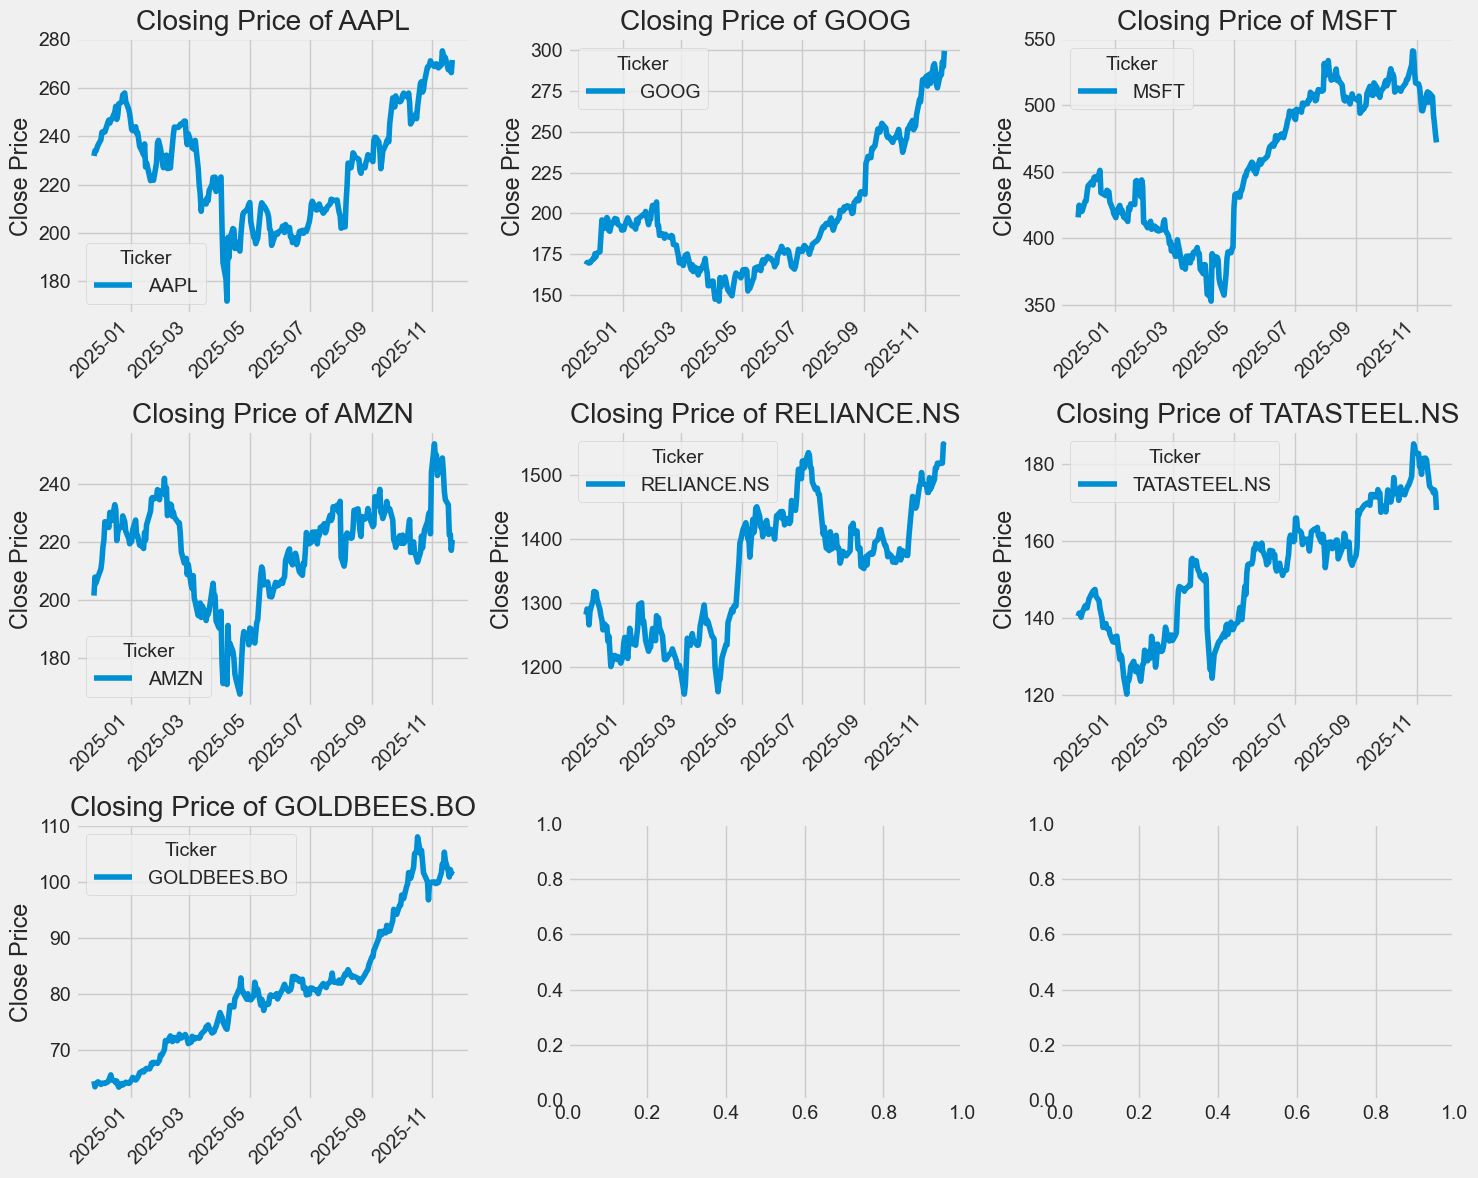

In [42]:
company_list = [AAPL , GOOG , MSFT , AMZN , RELIANCE , TATA , GOLD]
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for ax, company, ticker in zip(axes.flatten(), company_list, tech_list):
    company["Close"].plot(ax=ax)
    ax.set_title(f"Closing Price of {ticker}")
    ax.set_ylabel("Close Price")
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Now let's plot the total volume of stock being traded each day

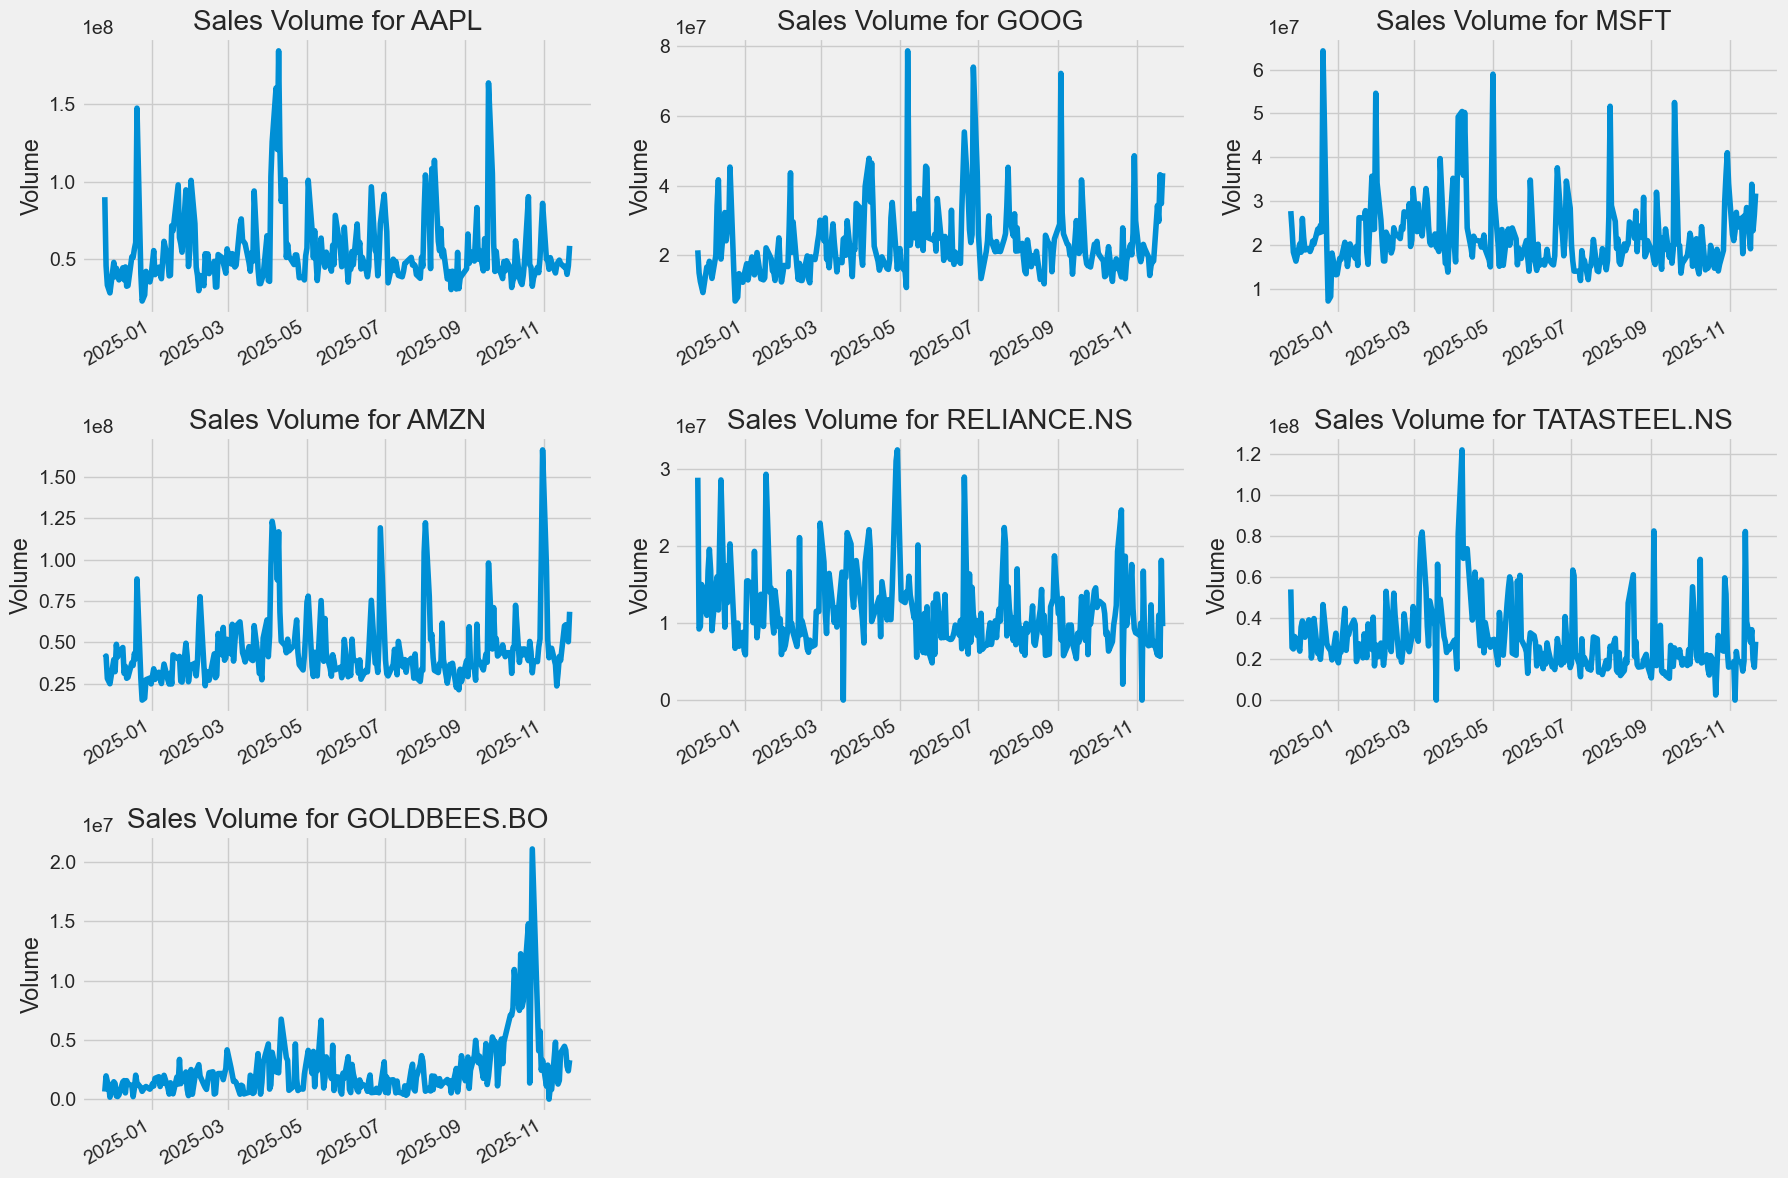

In [43]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (company, ticker) in enumerate(zip(company_list, tech_list), 1):

    plt.subplot(3, 3, i)   # 6 subplots → 3 rows × 2 columns
    
    # IMPORTANT — MultiIndex access
    company[("Volume", ticker)].plot()
    
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Sales Volume for {ticker}")

plt.tight_layout()
plt.show()



# 2. What was the moving average of the various stocks?

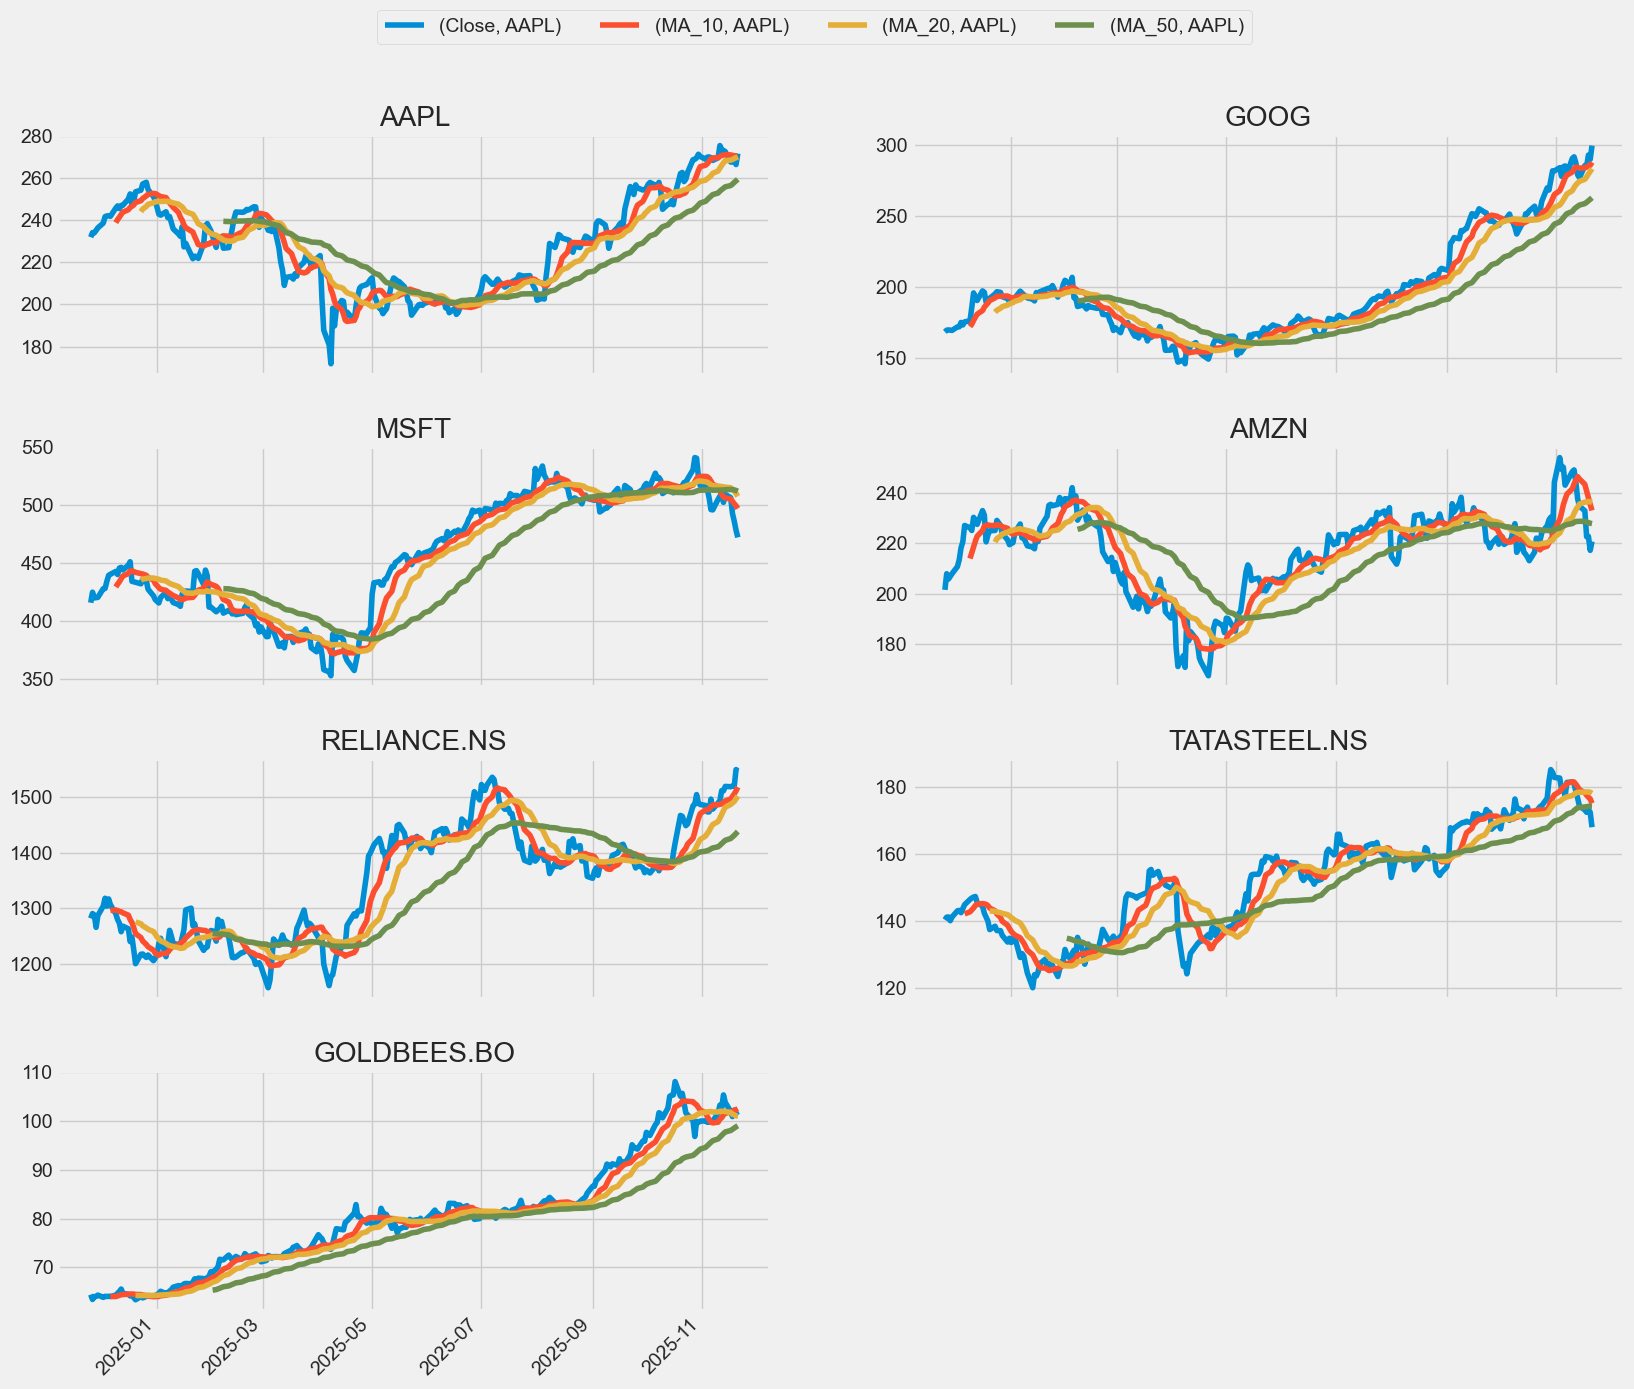

In [48]:
ma_day = [10, 20, 50]

# 1) Add MA columns to each dataframe
for company in company_list:
    for ma in ma_day:
        column_name = f"MA_{ma}"
        company[column_name] = company["Close"].rolling(ma).mean()

import math
num_stocks = len(company_list)
rows = math.ceil(num_stocks / 2)

# 2) Make subplots with shared x-axis
fig, axes = plt.subplots(
    nrows=rows,
    ncols=2,
    figsize=(18, 4.2 * rows),
    sharex=True
)
axes = axes.flatten()

for i, (company, ticker) in enumerate(zip(company_list, tech_list)):
    company[["Close", "MA_10", "MA_20", "MA_50"]].plot(
        ax=axes[i],
        legend=False  # hide per-subplot legend
    )
    axes[i].set_title(ticker)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 3) Add a single global legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 0.98))

# 4) Improve layout spacing
plt.subplots_adjust(hspace=0.3, wspace=0.2, top=0.9)
plt.show()


# 3. What was the daily return of the stock on average?

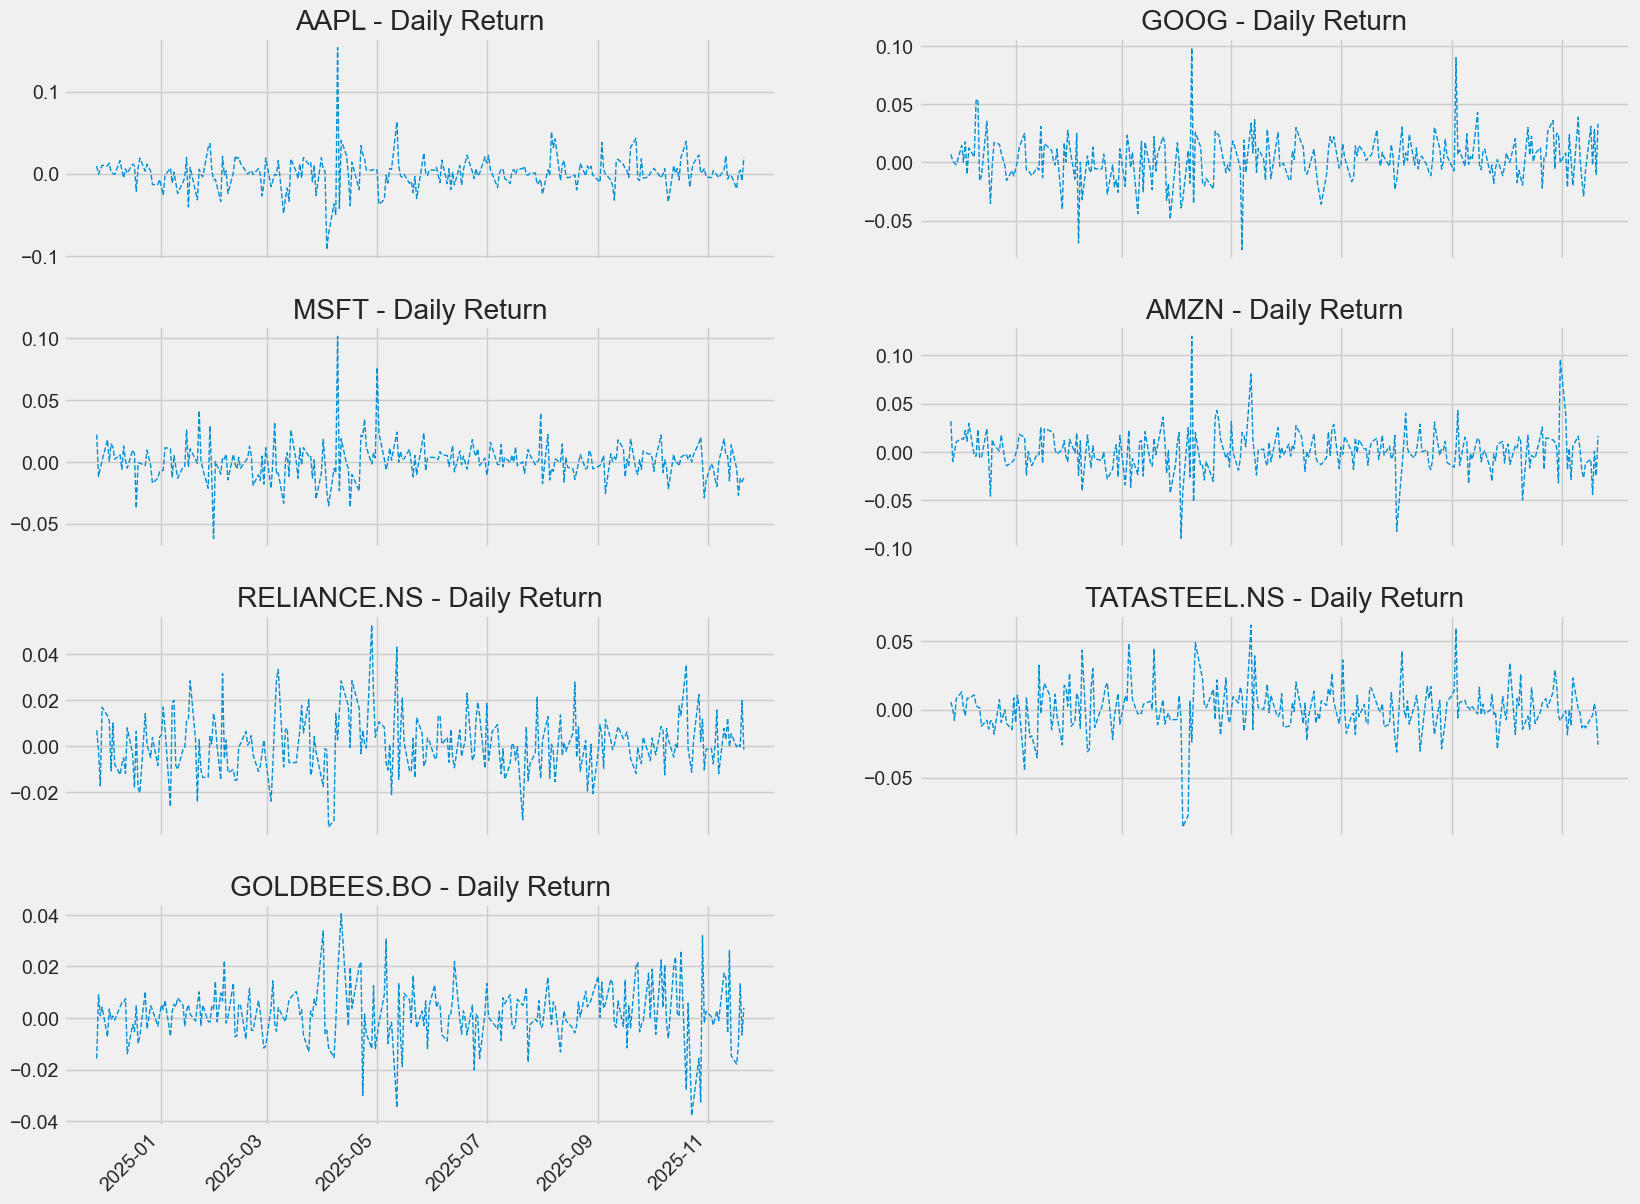

In [49]:
import math

num_stocks = len(company_list)       # 7
rows = math.ceil(num_stocks / 2)     # 4 rows (for 2 columns)

fig, axes = plt.subplots(
    nrows=rows,
    ncols=2,
    figsize=(18, 4 * rows),
    sharex=True
)
axes = axes.flatten()

for i, (company, ticker) in enumerate(zip(company_list, tech_list)):
    company["Daily Return"].plot(
        ax=axes[i],
        legend=False,     # one line per subplot -> no legend needed
        linestyle='--',
        linewidth=1
    )
    
    axes[i].set_title(f"{ticker} - Daily Return")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused axes (if rows*2 > number of stocks)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()


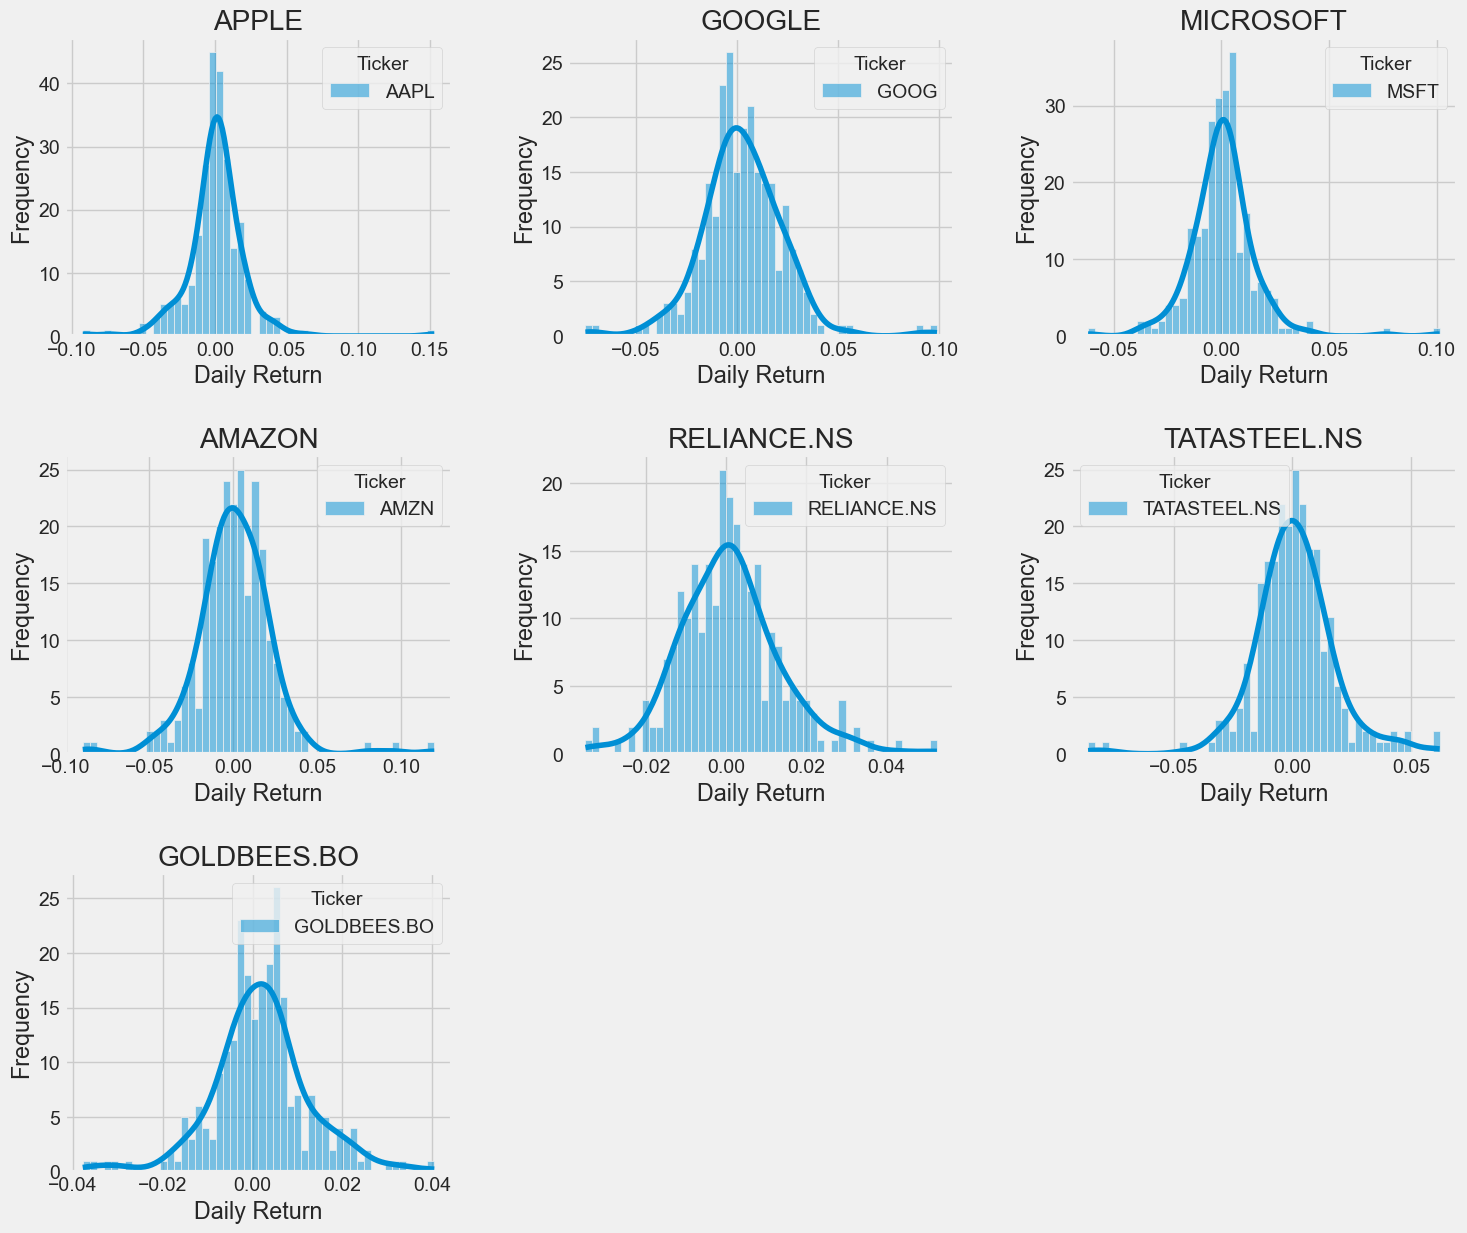

In [52]:


fig, axes = plt.subplots(3, 3, figsize=(16, 14))  # 9 slots for 7 stocks
axes = axes.flatten()

for i, (company, name) in enumerate(zip(company_list, company_name)):
    sns.histplot(
        company['Daily Return'].dropna(),
        bins=50,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(name)
    axes[i].set_xlabel('Daily Return')
    axes[i].set_ylabel('Frequency')

# Hide unused subplots (last 2)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.4, wspace=0.3)  # spacing adjustment
plt.show()


# 4. What was the correlation between different stocks closing prices?

In [53]:
closing_df = yf.download(
    tickers=tech_list,
    start=start,
    end=end
)["Close"]

print(closing_df.head())

# Daily Returns
tech_rets = closing_df.pct_change()

tech_rets.head()

C:\Users\91756\AppData\Local\Temp\ipykernel_10608\911104971.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  closing_df = yf.download(
[*********************100%***********************]  7 of 7 completed

Ticker            AAPL        AMZN  GOLDBEES.BO        GOOG        MSFT  \
Date                                                                      
2024-11-25  231.821518  201.449997    64.400002  168.691681  415.723297   
2024-11-26  234.001678  207.860001    63.389999  169.876495  424.855927   
2024-11-27  233.872238  205.740005    63.959999  170.075638  419.892517   
2024-11-28         NaN         NaN    64.019997         NaN         NaN   
2024-11-29  236.261444  207.889999    64.290001  169.747086  420.359131   

Ticker      RELIANCE.NS  TATASTEEL.NS  
Date                                   
2024-11-25  1281.880249    140.395889  
2024-11-26  1290.545654    141.177658  
2024-11-27  1288.055542    141.236282  
2024-11-28  1265.744751    140.122269  
2024-11-29  1287.059570    141.246048  



C:\Users\91756\AppData\Local\Temp\ipykernel_10608\911104971.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tech_rets = closing_df.pct_change()


Ticker          AAPL      AMZN  GOLDBEES.BO      GOOG      MSFT  RELIANCE.NS  \
Date                                                                           
2024-11-25       NaN       NaN          NaN       NaN       NaN          NaN   
2024-11-26  0.009404  0.031819    -0.015683  0.007024  0.021968     0.006760   
2024-11-27 -0.000553 -0.010199     0.008992  0.001172 -0.011683    -0.001930   
2024-11-28  0.000000  0.000000     0.000938  0.000000  0.000000    -0.017321   
2024-11-29  0.010216  0.010450     0.004217 -0.001932  0.001111     0.016840   

Ticker      TATASTEEL.NS  
Date                      
2024-11-25           NaN  
2024-11-26      0.005568  
2024-11-27      0.000415  
2024-11-28     -0.007888  
2024-11-29      0.008020

In [54]:
#Now we can compare the daily percentage return of two stocks to check how correlated. 
#First let's see a stock compared to itself.
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

In [55]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

In [56]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

In [57]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [58]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [59]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Text(0.5, 1.0, 'Correlation of stock closing price')

# 5. How much value do we put at risk by investing in a particular stock?

In [60]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [61]:
# Get stock data for a single stock (replace 'AAPL' with any ticker)
df = yf.download("AAPL", start='2015-01-01', end=end)
df

C:\Users\91756\AppData\Local\Temp\ipykernel_10608\2241908474.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start='2015-01-01', end=end)
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-01-02   24.237555   24.705324   23.798604   24.694239  212818400
2015-01-05   23.554737   24.086797   23.368517   24.006988  257142000
2015-01-06   23.556961   23.816340   23.195602   23.619034  263188400
2015-01-07   23.887278   23.987038   23.654501   23.765347  160423600
2015-01-08   24.805079   24.862719   24.097882   24.215380  237458000
...                ...         ...         ...         ...        ...
2025-11-17  267.459991  270.489990  265.730011  268.820007   45018300
2025-11-18  267.440002  270.709991  265.320007  269.989990   45677300
2025-11-19  268.559998  272.209991  265.500000  265.529999   40424500
2025-11-20  266.250000  275.429993  265.920013  270.829987   45823600
2025-11-21  271.489990  273.329987  265.670013  265.950012   58784100

[2740 rows x 5 columns]

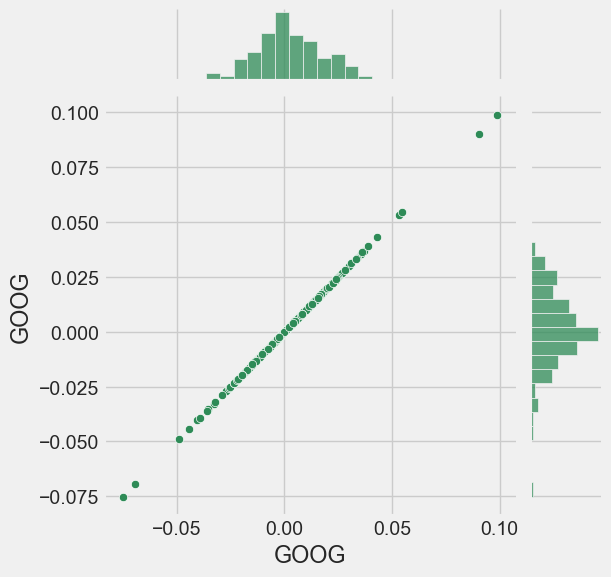

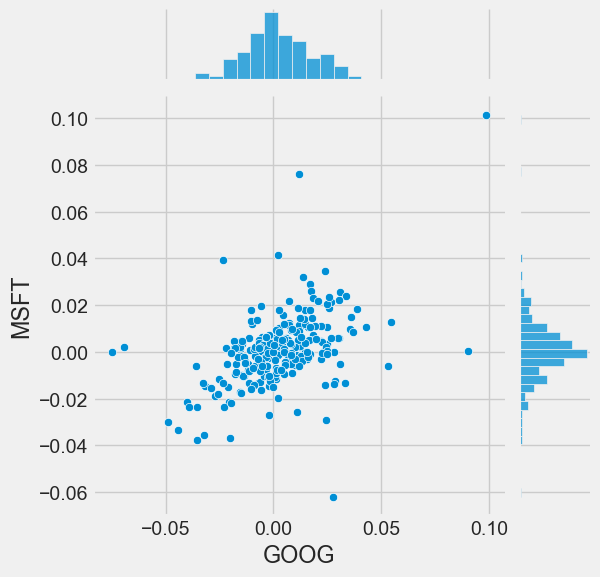

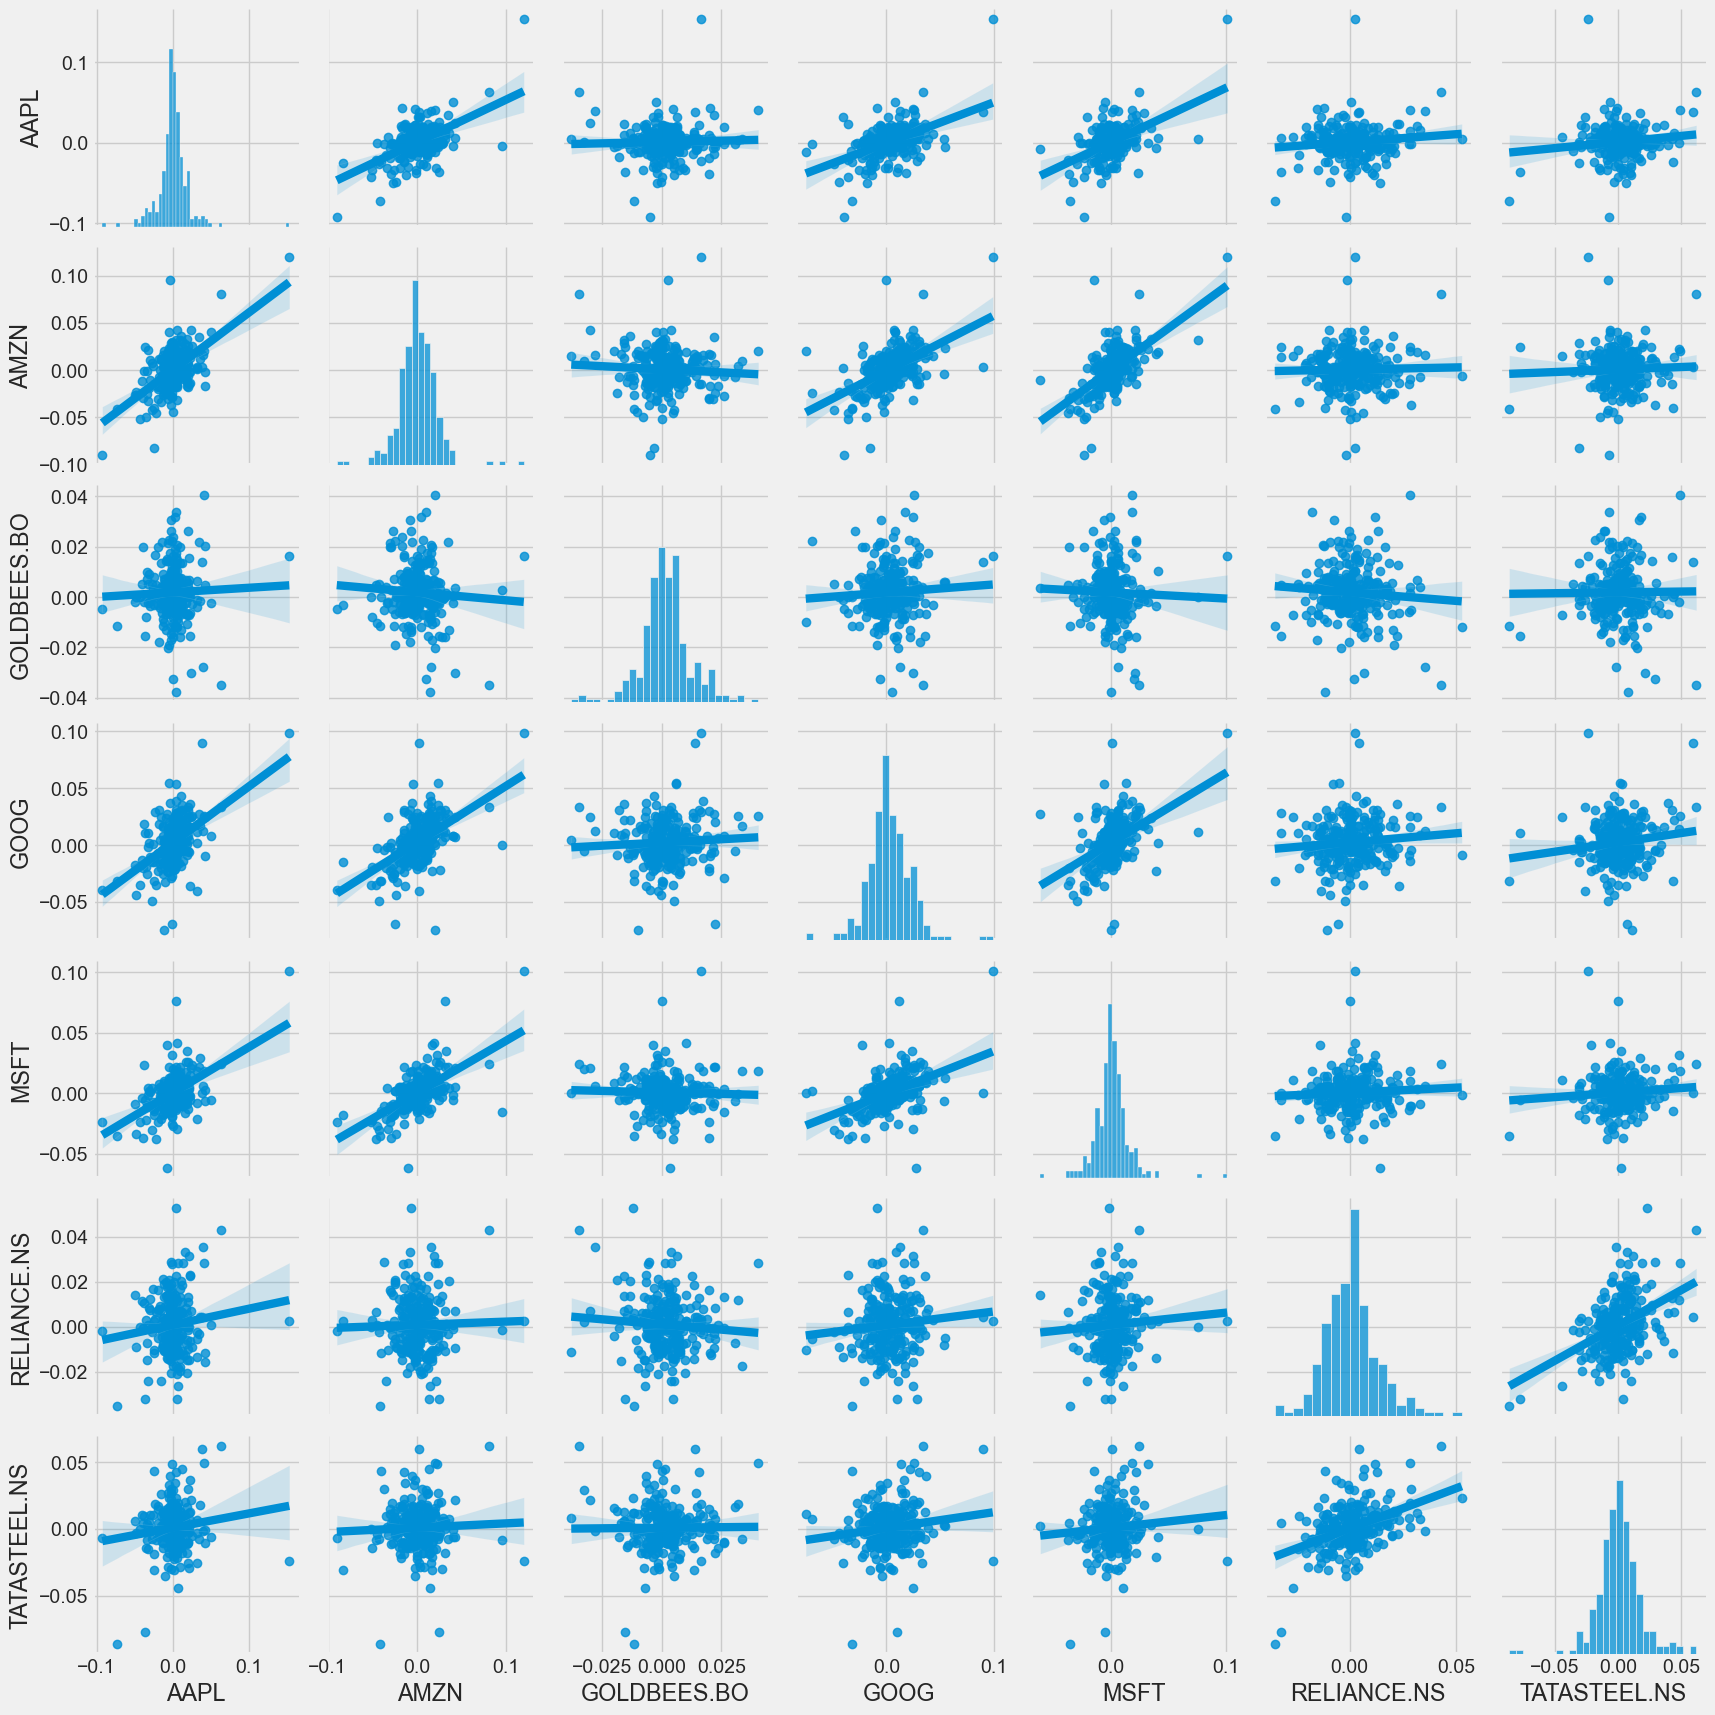

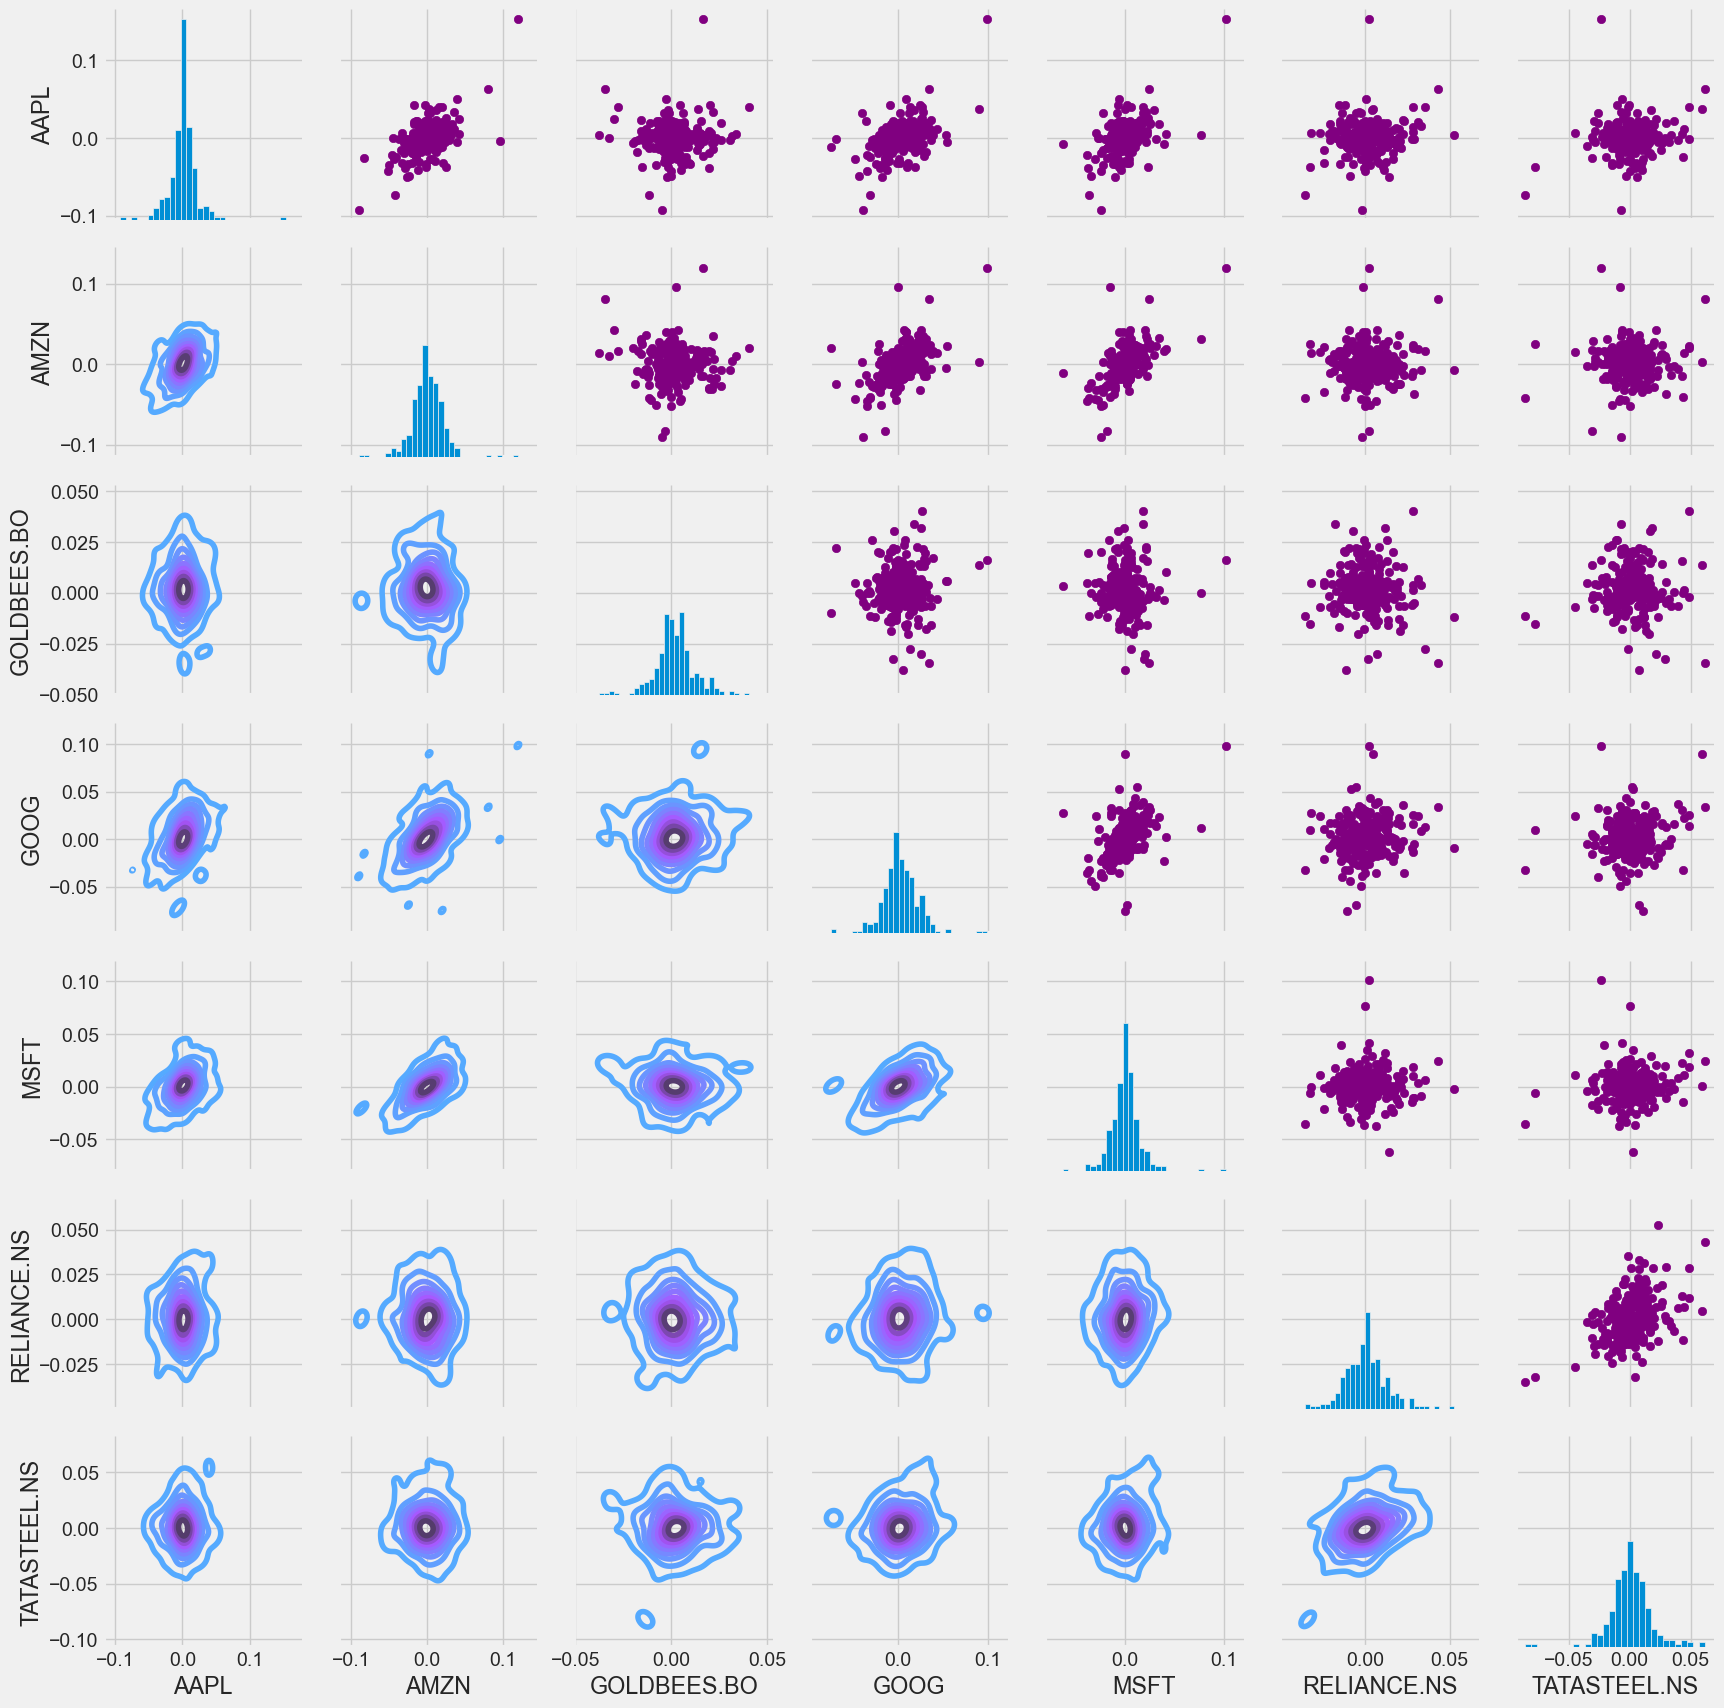

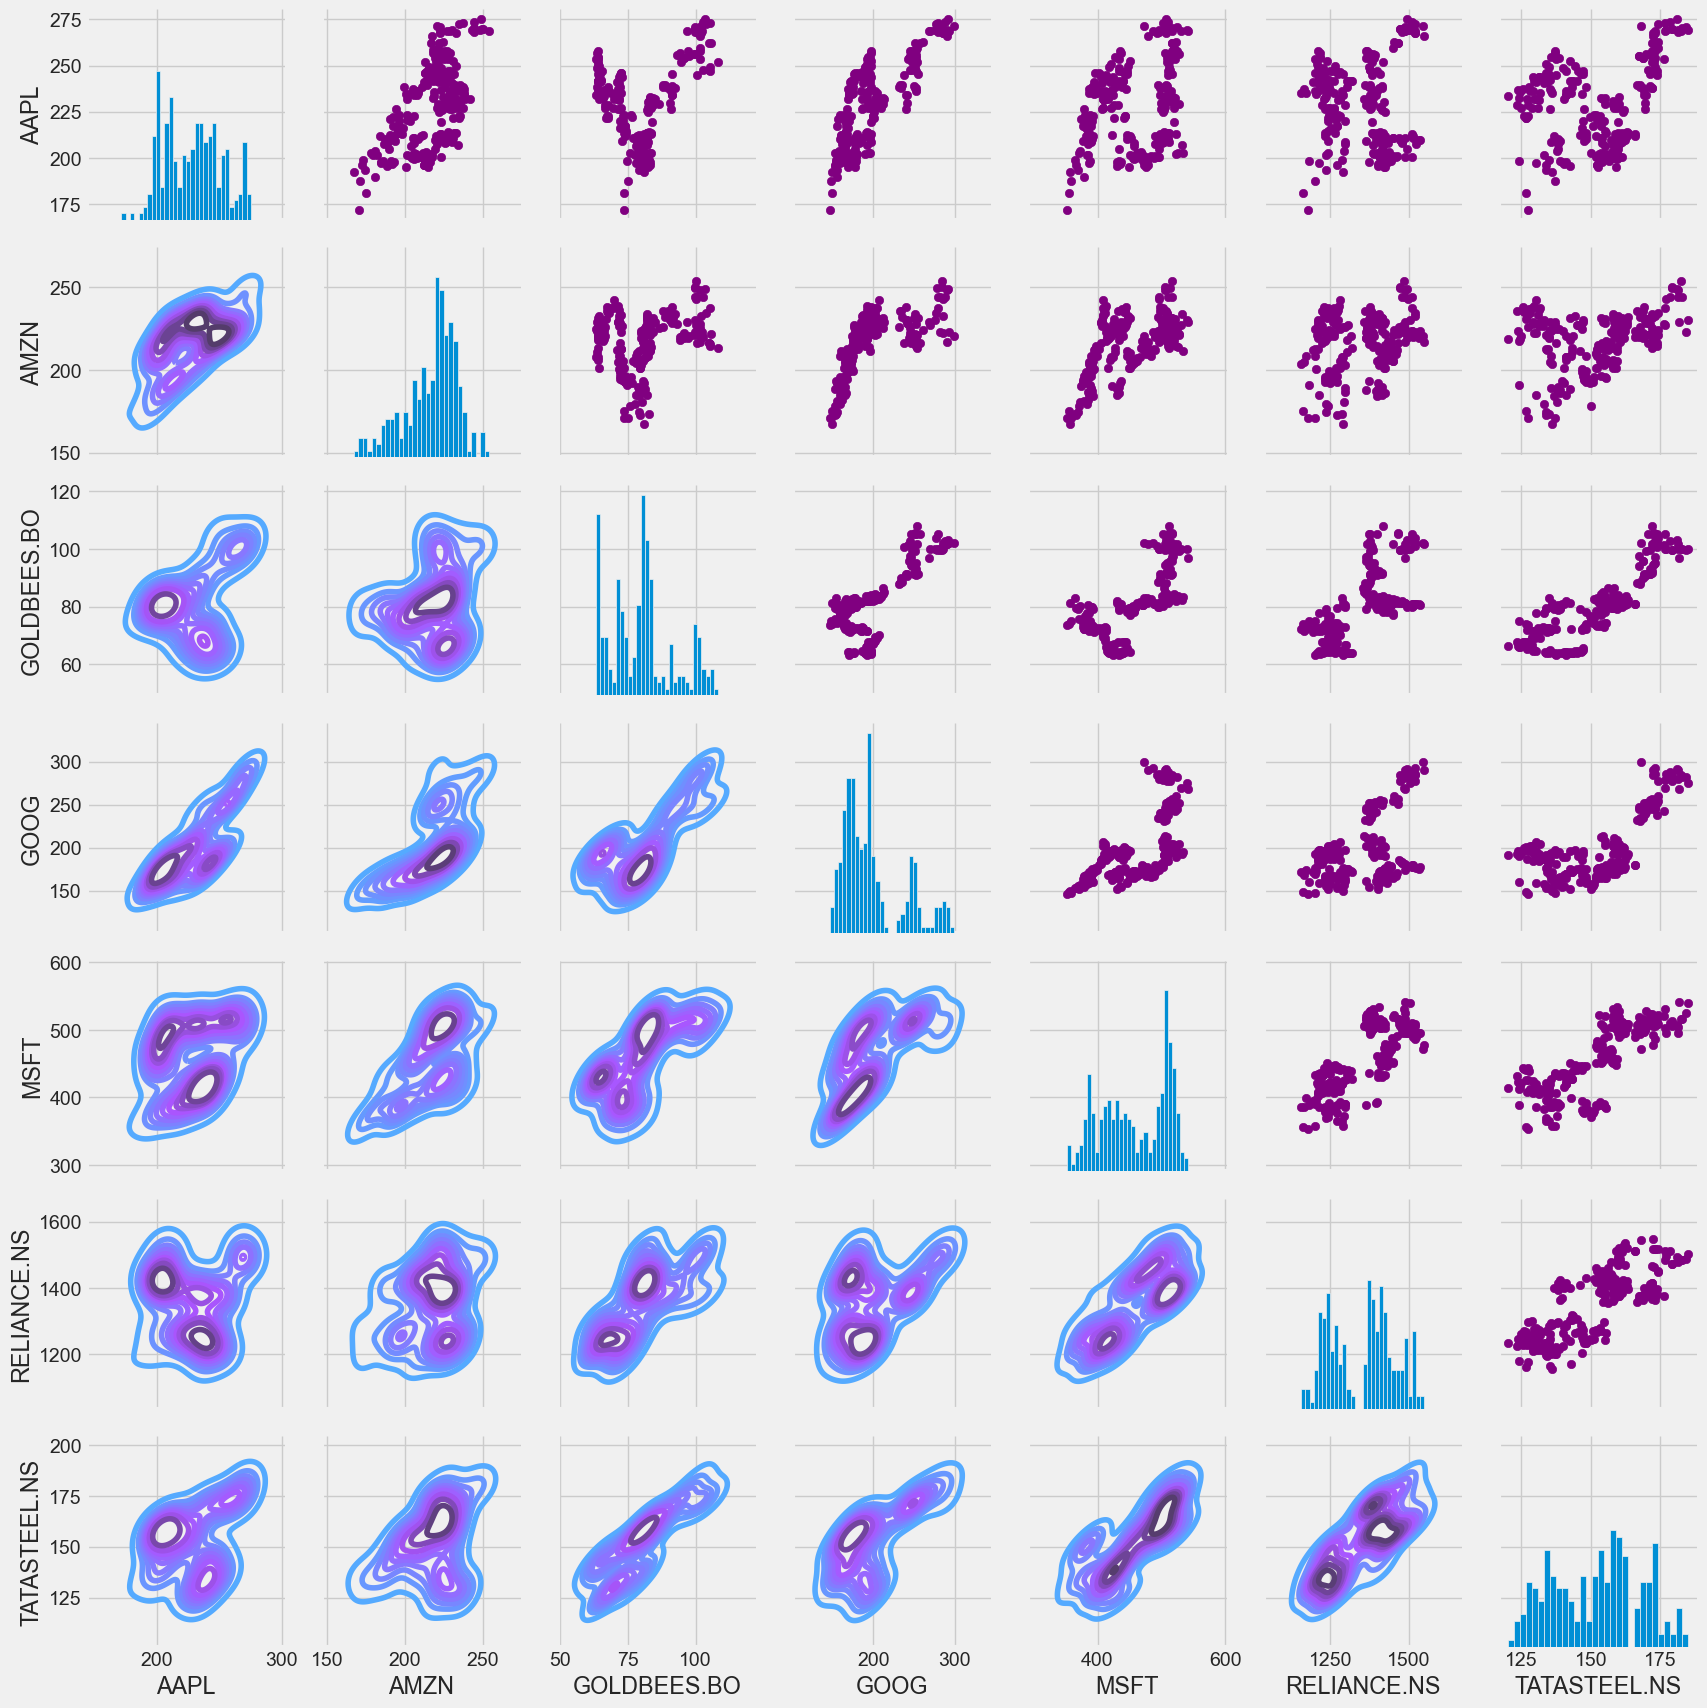

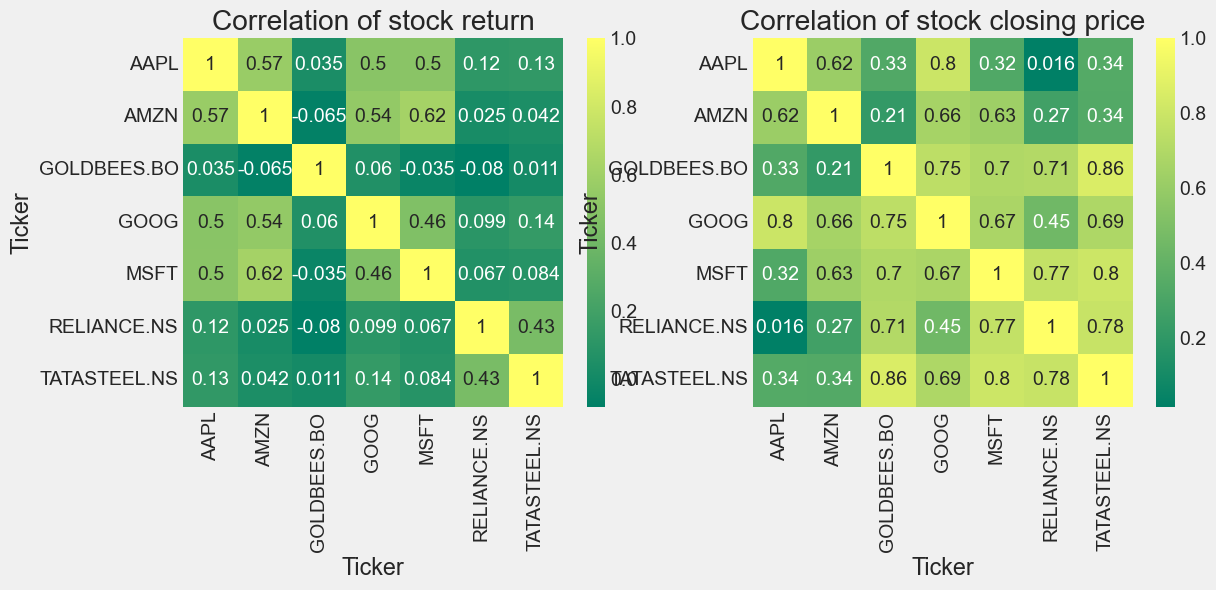

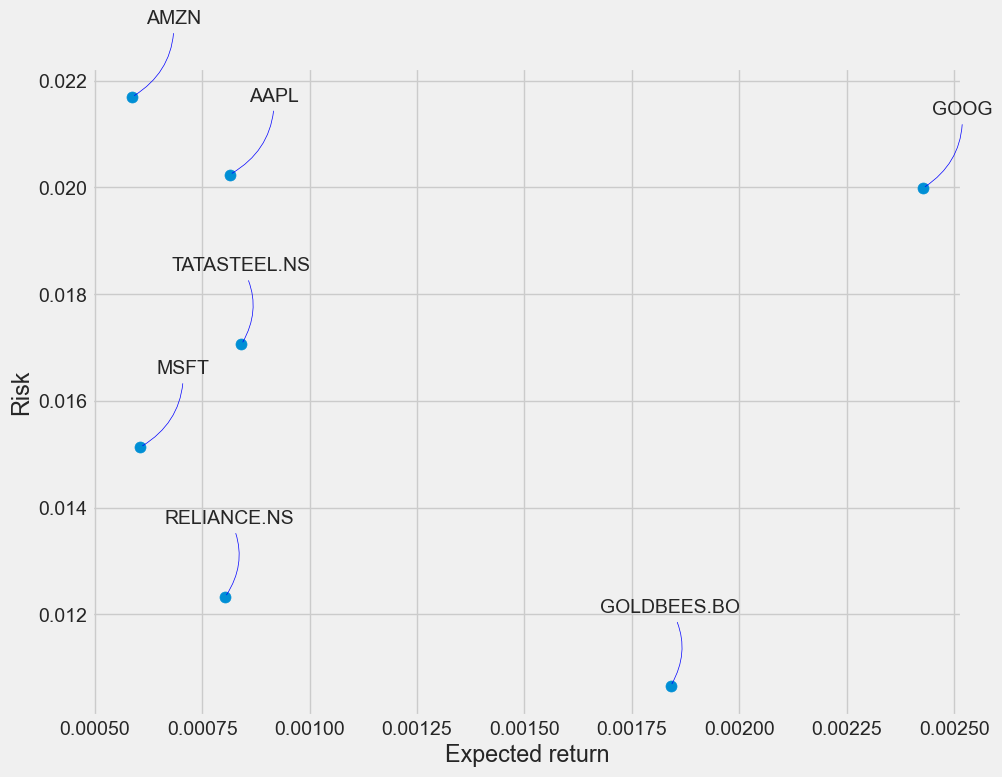

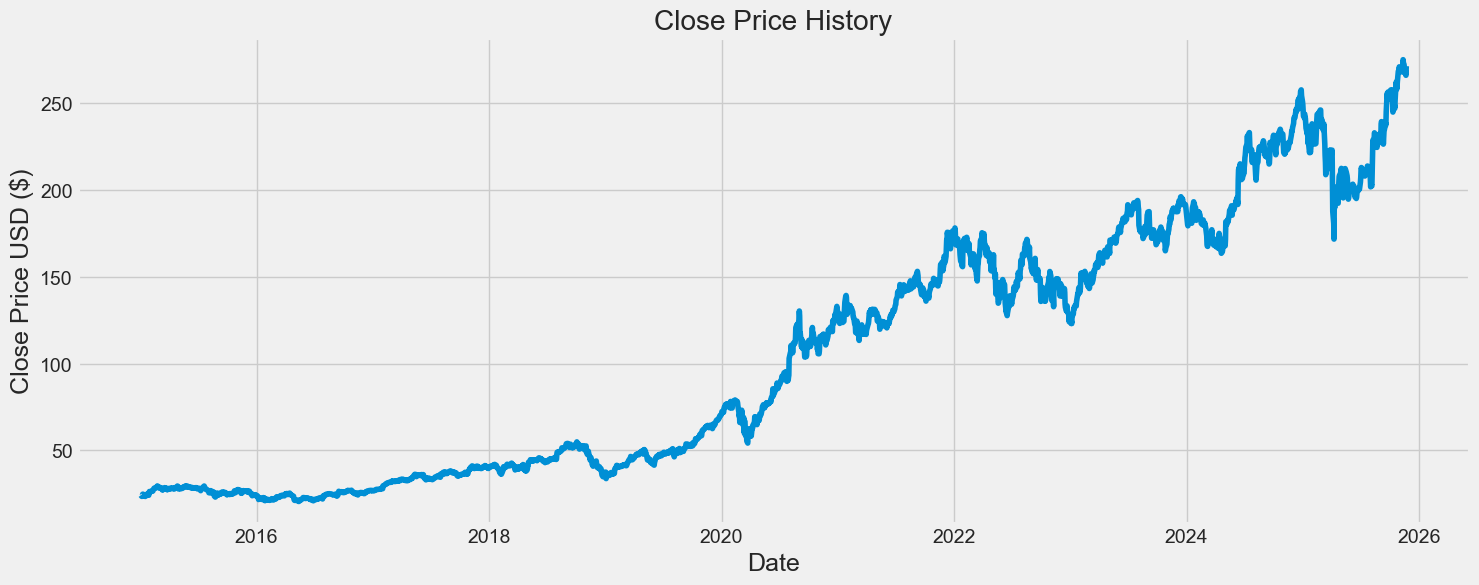

In [62]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [63]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2603

In [64]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import yfinance as yf

# Your tickers
tech_list = ["AAPL", "AMZN", "GOOG", "MSFT", "RELIANCE.NS", "TATASTEEL.NS"]

# Download the data
df = yf.download(tech_list, start=start, end=end)["Close"]

# Drop any missing values (important for scaling)
df = df.dropna()

# Choose one stock to train the model on (example: AAPL)
data = df[["AAPL"]]  # You can replace 'AAPL' with any other ticker

# Convert to NumPy array
dataset = data.values

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(dataset)

print("Scaled data shape:", scaled_data.shape)
print("First 5 scaled values:\n", scaled_data[:5])

C:\Users\91756\AppData\Local\Temp\ipykernel_10608\1567947966.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tech_list, start=start, end=end)["Close"]
[*********************100%***********************]  6 of 6 completed

Scaled data shape: (239, 1)
First 5 scaled values:
 [[0.58006676]
 [0.6011479 ]
 [0.59989628]
 [0.62299879]
 [0.64475332]]


In [65]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.58006676, 0.6011479 , 0.59989628, 0.62299879, 0.64475332,
       0.67420914, 0.67767454, 0.67796314, 0.67603796, 0.71367561,
       0.72349432, 0.7111731 , 0.72532314, 0.72695957, 0.75497121,
       0.77845867, 0.72618953, 0.74293874, 0.78818102, 0.79568931,
       0.82389365, 0.83178644, 0.79876932, 0.76613745, 0.74900315,
       0.68576032, 0.68104374, 0.69683021, 0.66997385, 0.67469058,
       0.61837855, 0.59479475, 0.58401346, 0.62819681, 0.53569101,
       0.55224752, 0.48159275, 0.49304788, 0.49141146, 0.48294043,
       0.55109268, 0.63195096, 0.6425397 , 0.6255016 , 0.61019627,
       0.53328454, 0.57939307, 0.57621657, 0.58343596, 0.52962675,
       0.53222842, 0.58012239, 0.62107775, 0.66598437, 0.69556855,
       0.69431589, 0.69817036, 0.70742161, 0.7047233 , 0.71966006])]
[np.float64(0.7190818249890265)]

[array([0.58006676, 0.6011479 , 0.59989628, 0.62299879, 0.64475332,
       0.67420914, 0.67767454, 0.67796314, 0.67603796, 0.71367561,
       0.72349432, 0.711

In [66]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


C:\Users\91756\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0190


In [67]:
look_back = 60  # number of days to look back

# If test part is too small, adjust training_data_len
if len(scaled_data) - training_data_len < look_back + 1:
    # make train a bit smaller so test has enough points
    training_data_len = len(scaled_data) - (look_back + 1)

# Create the testing data set: last (test + 60) points
test_data = scaled_data[training_data_len - look_back:, :]

x_test = []
y_test = []

for i in range(look_back, len(test_data)):
    # 60 previous timesteps
    x_test.append(test_data[i - look_back:i, 0])
    # true value from original (unscaled) data
    y_test.append(dataset[training_data_len + i - look_back, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)

print("x_test shape before reshape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Safety check
if x_test.ndim != 2 or x_test.shape[0] == 0:
    raise ValueError(
        f"x_test has invalid shape {x_test.shape}. "
        "Likely not enough data for a 60-day look_back. "
        "Try reducing look_back or using more data."
    )

# Reshape for LSTM: (samples, timesteps, features)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Predict
predictions = model.predict(x_test)

# Inverse scale predictions
predictions = scaler.inverse_transform(predictions)

# RMSE
rmse = np.sqrt(np.mean((predictions.flatten() - y_test) ** 2))
rmse


x_test shape before reshape: (61, 60)
y_test shape: (61,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step


np.float64(14.49344119695439)

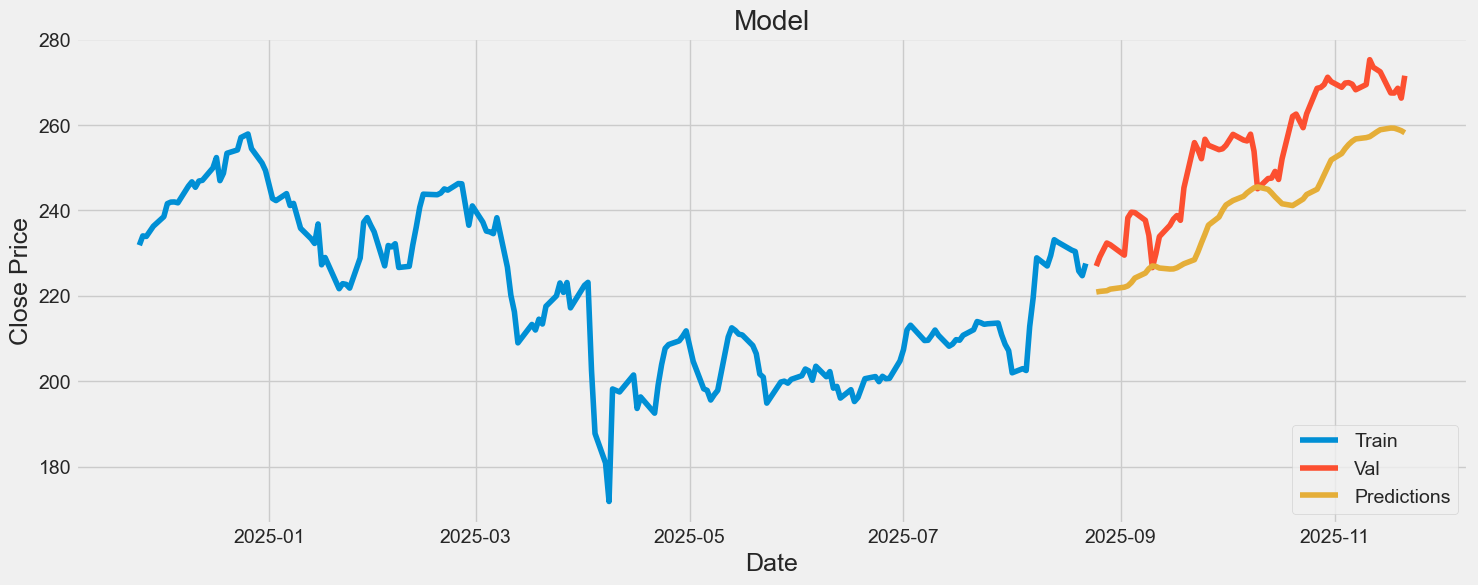

In [68]:
# Plot the data

# Split back into train and valid using the same training_data_len
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:].copy()   # copy to avoid warnings

# Make sure predictions length matches valid
valid["Predictions"] = predictions.flatten()   # (n,1) -> (n,)

# If your column is not exactly named 'Close', grab it dynamically
target_col = data.columns[0]

plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)

# Plot training data
plt.plot(train[target_col], label="Train")

# Plot actual validation data
plt.plot(valid[target_col], label="Val")

# Plot predictions
plt.plot(valid["Predictions"], label="Predictions")

plt.legend(loc="lower right")
plt.show()


In [69]:
# Show the valid and predicted prices
valid

Ticker            AAPL  Predictions
Date                               
2025-08-25  226.940002   220.858627
2025-08-26  229.087921   221.002487
2025-08-28  232.334778   221.168106
2025-08-29  231.915176   221.542786
2025-09-02  229.497528   221.990448
...                ...          ...
2025-11-17  267.459991   259.245300
2025-11-18  267.440002   259.214935
2025-11-19  268.559998   258.948120
2025-11-20  266.250000   258.631866
2025-11-21  271.489990   258.145355

[61 rows x 2 columns]

Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock